<a href="https://colab.research.google.com/github/bhuvnk/EVA/blob/master/Assignment6/EIP_Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


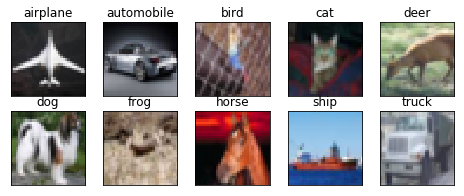

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Default Model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 32 // 3
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) # 30 // 5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 14 // 10
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))  # 14 // 12 
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) # 12 // 14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 6 // 16
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) # 6 // 18
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) # 4 // 20
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 2 // 40
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 12s 31ms/step - loss: 1.8376 - acc: 0.3000 - val_loss: 1.4230 - val_acc: 0.4844
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3115 - acc: 0.5262 - val_loss: 1.1078 - val_acc: 0.6016
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1140 - acc: 0.6063 - val_loss: 0.9687 - val_acc: 0.6544
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9763 - acc: 0.6580 - val_loss: 0.8712 - val_acc: 0.6915
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8773 - acc: 0.6958 - val_loss: 0.7737 - val_acc: 0.7414
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8116 - acc: 0.7188 - val_loss: 0.7734 - val_acc: 0.7352
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7396 - acc: 0.7467 - val_loss: 0.7244 - val_acc: 0.7585
Epoch 8/100
390/390 [==============================] - 9s 22m

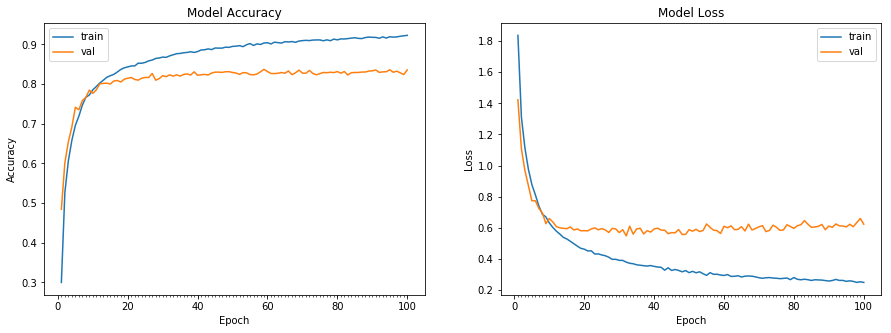

Accuracy on test data is: 83.56


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Fix you

Going to RF 1.5x of image size is better idea as backgrounds are also going to give some addition info.

In [0]:
train_features.shape

(50000, 32, 32, 3)

In [9]:
# Define the model
model = Sequential()   # ch size // RF

model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) #32 // 3
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #32 //5
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #32 //7
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(16, (1, 1), activation='relu')) #32 //7
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #16 // 14
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) #16 // 16
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) #16  // 18
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (1, 1), activation='relu')) #16 // 18
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #8 // 36
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) #8 //38
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) #8 // 40
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (1, 1), activation='relu')) #8 // 40 # to save some parameters
model.add(BatchNormalization())

model.add(Conv2D(10, (8, 8))) #4 // 68

# model.add(MaxPooling2D(pool_size=(2, 2))) #4 // 80 
# # model.add(Dropout(0.25))

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same')) #4 //82
# model.add(BatchNormalization())

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same')) #4 // 84
# model.add(BatchNormalization())

# model.add(Conv2D(10, (4, 4))) #4 // 87





model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 17s 45ms/step - loss: 1.8716 - acc: 0.3707 - val_loss: 2.1901 - val_acc: 0.3193
Epoch 2/100
390/390 [==============================] - 15s 37ms/step - loss: 1.4251 - acc: 0.5139 - val_loss: 1.3544 - val_acc: 0.5368
Epoch 3/100
390/390 [==============================] - 15s 37ms/step - loss: 1.2335 - acc: 0.5798 - val_loss: 1.1294 - val_acc: 0.6087
Epoch 4/100
390/390 [==============================] - 15s 37ms/step - loss: 1.0948 - acc: 0.6330 - val_loss: 1.0850 - val_acc: 0.6326
Epoch 5/100
390/390 [==============================] - 15s 38ms/step - loss: 0.9888 - acc: 0.6625 - val_loss: 1.0264 - val_acc: 0.6376
Epoch 6/100
390/390 [==============================] - 15s 38ms/step - loss: 0.8659 - acc: 0.6970 - val_loss: 0.8615 - val_acc: 0.6996
Epoch 7/100
390/390 [==============================] - 15s 38ms/step - loss: 0.7913 - acc: 0.7242 - val_loss: 0.8020 - val_acc: 0.7199
Epoch 8/100
390/390 [==============================] - 

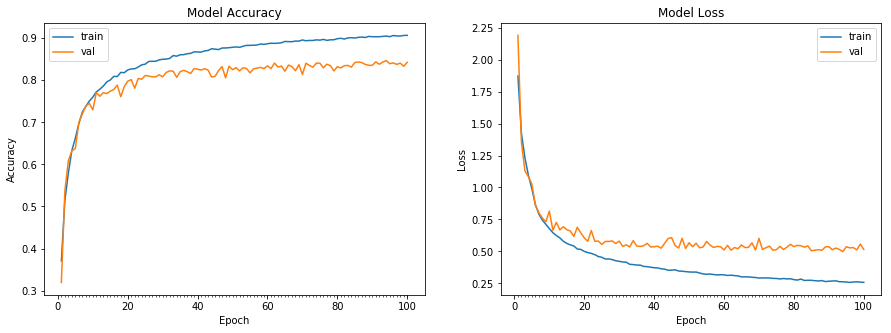

Accuracy on test data is: 84.26


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))